In [ ]:
from google.colab import files
uploaded = files.upload()  # Opens a file upload dialog


Saving train (1).csv to train (1) (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import naive_bayes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import ipywidgets as widgets
from io import BytesIO
classification_report_dict = {}
acc_dict = {}
confusion_matrix_dict = {}

data = pd.read_csv('train (1).csv')
print(data.head())



   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

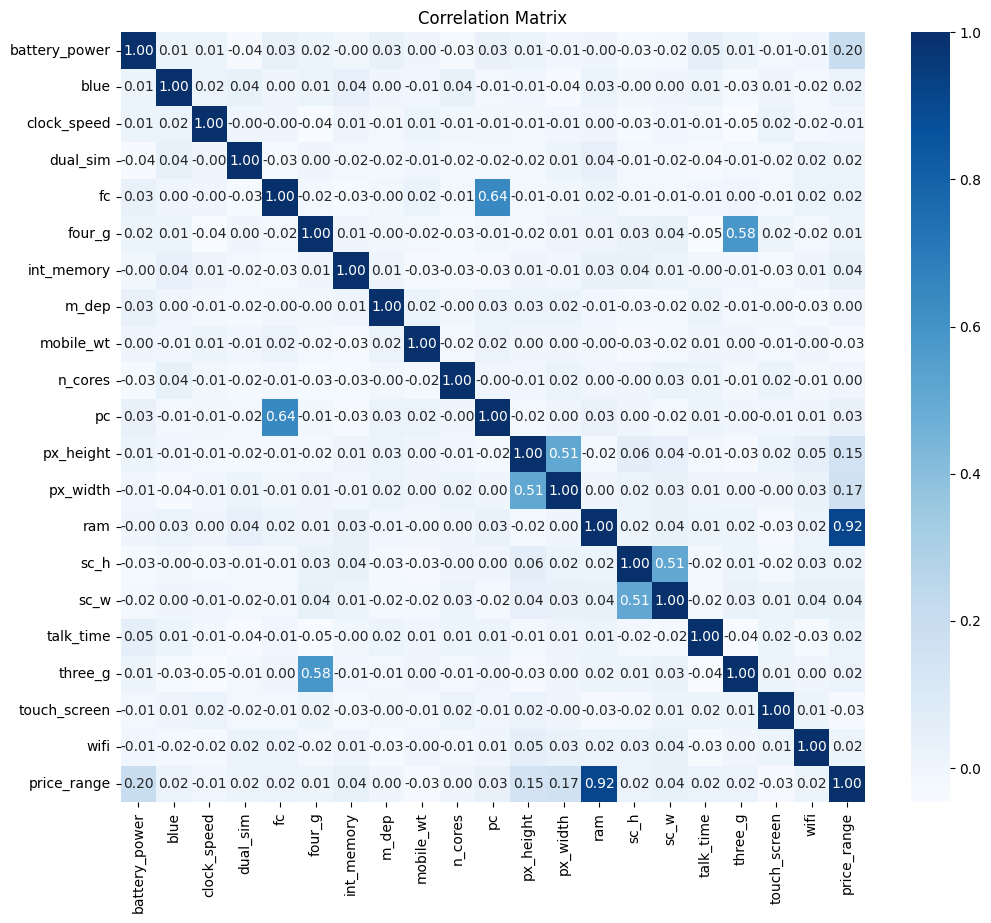

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

as we can conclude from correlation matrix that there's a lot of features that don't have as much as importance as others so we need to select the more correlated features

In [ ]:
feature_dropdown = widgets.Dropdown(
    options=data.columns,
    value=data.columns[0],
    description="Feature:",
)
def plot_histogram(feature):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, color='#80a37f', bins=10)
    plt.title(f'Histogram for {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(alpha=0.3)
    plt.show()

widgets.interactive(plot_histogram, feature=feature_dropdown)

interactive(children=(Dropdown(description='Feature:', options=('battery_power', 'blue', 'clock_speed', 'dual_…

In [ ]:
def plot_pie_chart(feature):
    plt.figure(figsize=(8, 6))

    # Handle discrete vs continuous features
    if len(data[feature].unique()) > 10:  # Continuous data
        grouped = pd.cut(data[feature], bins=5).value_counts()
        labels = grouped.index.astype(str)
        values = grouped.values
    else:  # Discrete data
        grouped = data[feature].value_counts()
        labels = grouped.index
        values = grouped.values

    # Use a colormap to create a set of colors
    cmap =sns.color_palette("light:b", as_cmap=True)
    colors = [cmap(i / len(values)) for i in range(len(values))]  # Sample colors from the colormap

    # Pie chart
    plt.pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    plt.title(f'Pie Chart for {feature}', fontsize=16)
    plt.axis('equal')  # Ensures pie is drawn as a circle
    plt.show()

# Call the function
widgets.interactive(plot_pie_chart, feature=feature_dropdown)

interactive(children=(Dropdown(description='Feature:', options=('battery_power', 'blue', 'clock_speed', 'dual_…

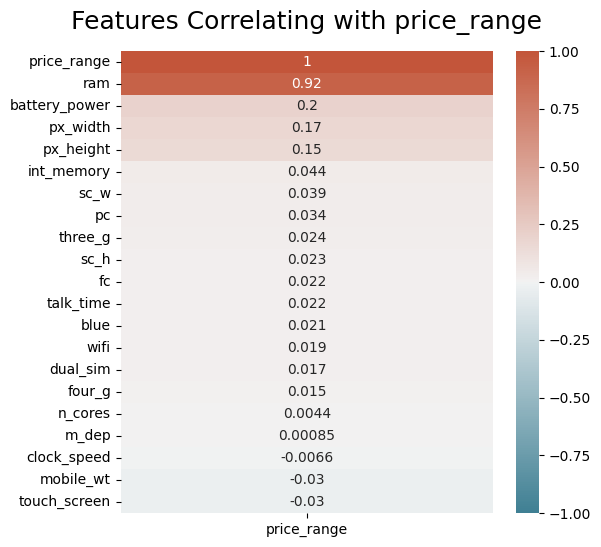

In [ ]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(data.corr()[['price_range']].sort_values(by='price_range', ascending=False), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
heatmap.set_title('Features Correlating with price_range', fontdict={'fontsize':18}, pad=16);

In [ ]:
from ipywidgets import interact
df_box = ['battery_power', 'mobile_wt', 'px_height', 'px_width',
          'ram', 'clock_speed', 'fc', 'int_memory',
          'pc', 'm_dep', 'talk_time']

def display_boxplot(column):
    fig = plt.figure(figsize=(10, 5), facecolor='#b5ae9c')
    box = sns.boxplot(x=column, data=data, color="#b5ae9c", width=0.5, dodge=True)
    box.set_title(f"Boxplot of Column {column}", fontsize=16, color='black')
    box.set(xlabel=None)
    plt.grid()
    plt.show()

# Create dropdown
interact(display_boxplot, column=widgets.Dropdown(options=df_box, description='Select Column:'));

interactive(children=(Dropdown(description='Select Column:', options=('battery_power', 'mobile_wt', 'px_height…

In [ ]:

columns = list(data.columns)
columns.remove('price_range')

def plot_graph(x, y):
    f, ax = plt.subplots(figsize=(10, 6))
    sns.despine(bottom=True, left=True)

    # Create a colormap
    cmap = sns.color_palette("light:b", as_cmap=True)

    # Use scatterplot instead of stripplot for colormap compatibility
    scatter = ax.scatter(
        x=data[x],
        y=data[y],
        c=data['price_range'],
        cmap=cmap,
        alpha=0.7,
        edgecolor='k'
    )

    # Add a colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label("Price Range")

    # Set the plot aesthetics
    plt.title(f"{y} vs {x} with 'price_range'", fontsize=14)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

    plt.show()

interact(
    plot_graph,
    x=widgets.Dropdown(options=columns, description='X-axis:'),
    y=widgets.Dropdown(options=columns, value=data.columns[-8], description='Y-axis:')
);

interactive(children=(Dropdown(description='X-axis:', options=('battery_power', 'blue', 'clock_speed', 'dual_s…

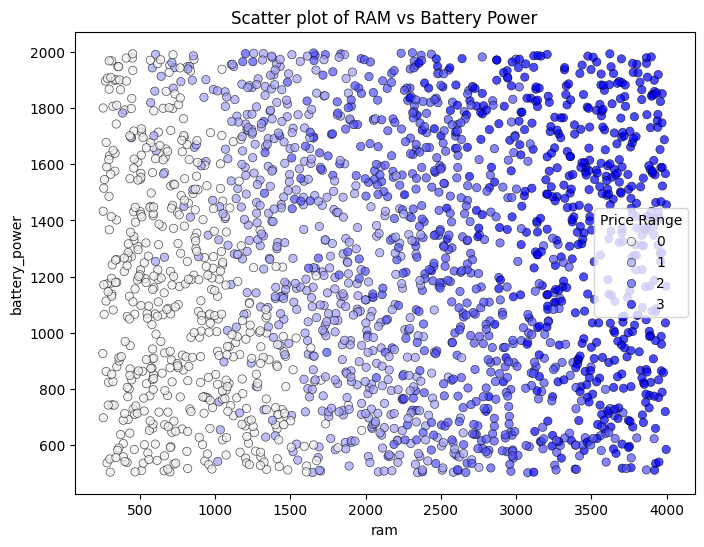

In [ ]:
cmap = sns.color_palette("light:b", as_cmap=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data,
    x='ram',
    y='battery_power',
    hue='price_range',
    palette=cmap,
    alpha=0.7,
    edgecolor='k'
)


plt.title('Scatter plot of RAM vs Battery Power')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(title="Price Range", loc="best", frameon=True)

plt.show()

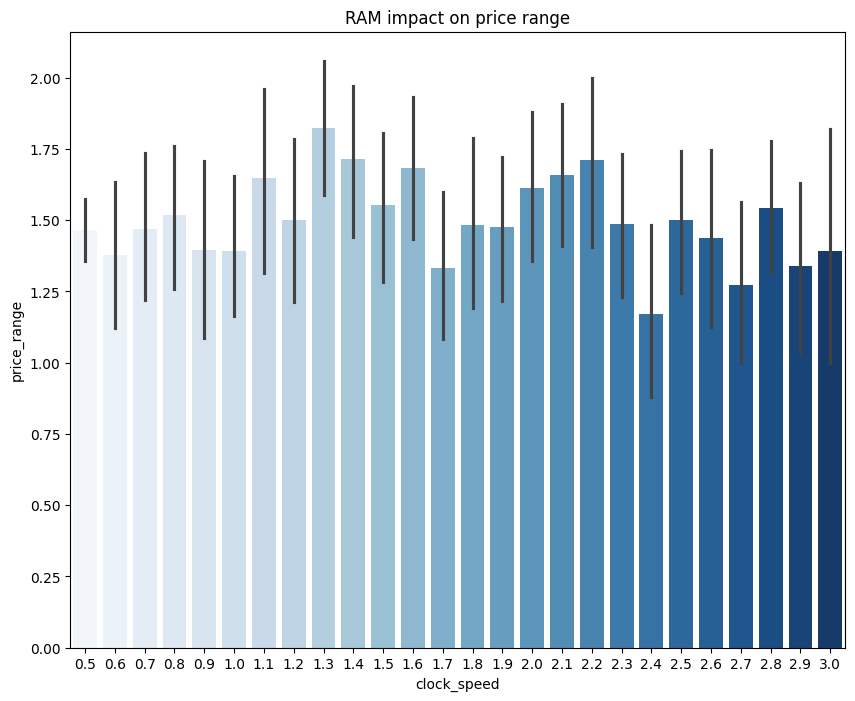

In [ ]:
plt.figure(figsize=(10, 8))

sns.barplot(data=data, x='clock_speed', y='price_range', palette='Blues')
plt.title('RAM impact on price range')
plt.show()

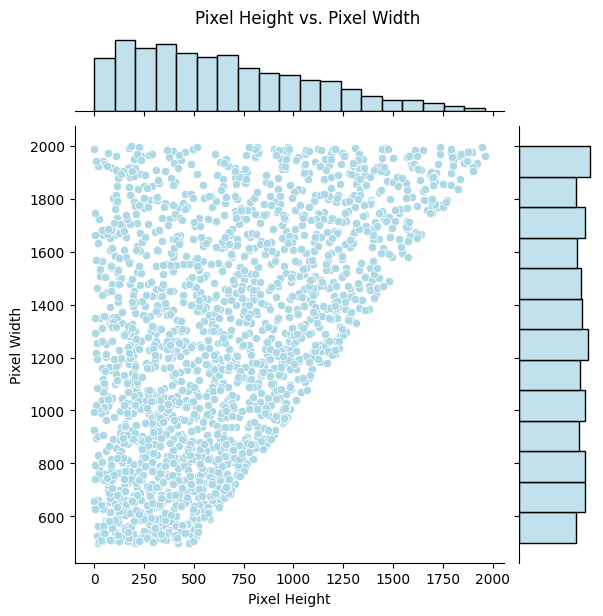

In [ ]:
sns.jointplot(data=data, x='px_height', y='px_width', kind='scatter', color='lightblue')
plt.suptitle('Pixel Height vs. Pixel Width', y=1.02)
plt.xlabel('Pixel Height')
plt.ylabel('Pixel Width')
plt.show()


In [ ]:
import plotly.express as px
def plot_numerical_features_distribution(df_imputed: pd.DataFrame) -> None:
    numerical_cols = df_imputed.select_dtypes(include=np.number).columns
    for col in numerical_cols:
        fig = px.histogram(df_imputed,
                           x=col,
                           nbins=30,
                           title=f'Distribution of {col.capitalize()}',
                           marginal='box',
                           opacity=0.75,
                           labels={col: col.capitalize()},
                           color_discrete_sequence=['lightblue'])
        fig.show()

# Example usage:
print("Plotting numerical feature distributions...")
# Replace `data` with your actual DataFrame
plot_numerical_features_distribution(data)

Plotting numerical feature distributions...


# **KNN K Nearest Neighbours algorithm**

In [ ]:
x=data.iloc[: , :-1]
y=data['price_range']

In [ ]:
x

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2   2         20       756  2549     9     7   
1       0.7        136        3   6        905      1988  2631    17     3   
2       0.9        145        5   6       1263      1716  2603    11     2   
3       0.8        131        6   9       1216      1786  2769    16     8   
4       0.6        141        2  14       1208      1212  1411     8     2   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1995    0.8        106        6  14       1222      1890   668    13     4   
1996    0.2        187        4   3        915      1965  2032    11    10   
1997    0.7        108        8   3        868      1632  3057     9     1   
1998    0.1        145        5   5        336       670   869    18    10   
1999    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  
0            19        0             0     1  
1             7        1             1     0  
2             9        1             1     0  
3            11        1             0     0  
4            15        1             1     0  
...         ...      ...           ...   ...  
1995         19        1             1     0  
1996         16        1             1     1  
1997          5        1             1     0  
1998         19        1             1     1  
1999          2        1             1     1  

[2000 rows x 20 columns]

In [ ]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [ ]:
sc=StandardScaler()
x=sc.fit_transform(x)


In [ ]:
threshold=0.01
high=correlation_matrix.index[abs(correlation_matrix['price_range'])>threshold].to_list()
high.remove('price_range')
xSelected=data[high]
xSelected

battery_power  blue  dual_sim  fc  four_g  int_memory  mobile_wt  pc  \
0               842     0         0   1       0           7        188   2   
1              1021     1         1   0       1          53        136   6   
2               563     1         1   2       1          41        145   6   
3               615     1         0   0       0          10        131   9   
4              1821     1         0  13       1          44        141  14   
...             ...   ...       ...  ..     ...         ...        ...  ..   
1995            794     1         1   0       1           2        106  14   
1996           1965     1         1   0       0          39        187   3   
1997           1911     0         1   1       1          36        108   3   
1998           1512     0         0   4       1          46        145   5   
1999            510     1         1   5       1          45        168  16   

      px_height  px_width   ram  sc_h  sc_w  talk_time  three_g  touch_screen  \
0            20       756  2549     9     7         19        0             0   
1           905      1988  2631    17     3          7        1             1   
2          1263      1716  2603    11     2          9        1             1   
3          1216      1786  2769    16     8         11        1             0   
4          1208      1212  1411     8     2         15        1             1   
...         ...       ...   ...   ...   ...        ...      ...           ...   
1995       1222      1890   668    13     4         19        1             1   
1996        915      1965  2032    11    10         16        1             1   
1997        868      1632  3057     9     1          5        1             1   
1998        336       670   869    18    10         19        1             1   
1999        483       754  3919    19     4          2        1             1   

      wifi  
0        1  
1        0  
2        0  
3        0  
4        0  
...    ...  
1995     0  
1996     1  
1997     0  
1998     1  
1999     1  

[2000 rows x 17 columns]

Split the data into training and testing

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(xSelected,y,test_size=0.2,random_state=42)

Find the optimal k value using cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 20)
metrics = ['euclidean', 'manhattan']
results = []

for k in k_values:
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

        # Store results:
        results.append({
            'k': k,
            'metric': metric,
            'mean_accuracy': np.mean(cv_scores),
        })


results_df = pd.DataFrame(results)
print(results_df)

     k     metric  mean_accuracy
0    1  euclidean       0.885000
1    1  manhattan       0.890625
2    2  euclidean       0.891875
3    2  manhattan       0.891875
4    3  euclidean       0.908125
5    3  manhattan       0.904375
6    4  euclidean       0.902500
7    4  manhattan       0.901875
8    5  euclidean       0.918125
9    5  manhattan       0.915000
10   6  euclidean       0.916875
11   6  manhattan       0.913750
12   7  euclidean       0.921875
13   7  manhattan       0.920000
14   8  euclidean       0.918125
15   8  manhattan       0.909375
16   9  euclidean       0.923750
17   9  manhattan       0.921875
18  10  euclidean       0.922500
19  10  manhattan       0.916875
20  11  euclidean       0.928750
21  11  manhattan       0.921250
22  12  euclidean       0.927500
23  12  manhattan       0.913750
24  13  euclidean       0.924375
25  13  manhattan       0.921875
26  14  euclidean       0.925625
27  14  manhattan       0.920000
28  15  euclidean       0.917500
29  15  ma

Visualizing

In [ ]:
import plotly.express as px
import plotly.io as pio
fig = px.line(
    results_df,
    x='k',
    y='mean_accuracy',
    color='metric',
    markers=True,
    title='KNN Accuracy Across k Values and Metrics',
    labels={'k': 'Number of Neighbors (k)', 'Accuracy': 'Model Accuracy'},
    template='plotly_white'
)

fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=1, dtick=1),
    legend_title_text='Distance Metric'
)

fig.show()

In [ ]:
best_result = results_df.loc[results_df['mean_accuracy'].idxmax()]
best_k = best_result['k']
best_metric = best_result['metric']
print(f"Best k: {best_k}, Best metric: {best_metric}")

Best k: 11, Best metric: euclidean


another way to find k  using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors': range(1, 20),
    'metric': ['euclidean', 'manhattan']
}
grid_knn =GridSearchCV(estimator=knn ,
                     param_grid=parameters ,
                     scoring ="accuracy" ,
                     cv =5 ,
                     verbose=1 ,
                     n_jobs=-1)

In [ ]:
grid_knn.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=19),
             n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy', verbose=1)

In [ ]:
grid_knn.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
grid_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 11}

Train the KNN classifier with the optimal k which is 11


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

Evaluate the model's accuracy on the test set

In [ ]:
knn.score(X_test,y_test)

0.95

Classification report to see precision, recall and F1 score

In [ ]:
predknn=knn.predict(X_test)
print(classification_report(y_test,predknn))
classification_report_dict["knn"] = classification_report(y_test,predknn,  output_dict=True)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.96      0.94        91
           2       0.91      0.93      0.92        92
           3       1.00      0.93      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



-Accuracy: The overall accuracy of the model is 95%, which is quite high. This means that the model correctly predicted the class for 95% of the instances in the test set.

-Macro Average and Weighted Average: Both macro average and weighted average for precision, recall, and F1-score are around 95%, indicating a good balance in performance across all classes.
Class-wise Performance

Class 0: Achieves high precision (0.97), recall (0.98), and F1-score (0.98), indicating excellent performance in identifying instances of this class.

Class 1: Shows good performance with precision (0.92), recall (0.96), and F1-score (0.94).
Class 2: Has slightly lower precision (0.91) and recall (0.93) compared to the other classes, but still maintains a decent F1-score (0.92).

Class 3: Achieves perfect precision (1.00), meaning it correctly identifies all instances of this class. However, it has a lower recall (0.93), indicating some instances of this class were missed. The F1-score (0.96) balances precision and recall.

In [ ]:
train_accuracyknn = knn.score(X_train, y_train)
test_accuracyknn = knn.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracyknn*100}%")
print(f"Testing Accuracy: {test_accuracyknn*100}%")
acc_dict["knn"] = test_accuracyknn*100

Training Accuracy: 95.1875%
Testing Accuracy: 95.0%


Confusion matrix to visualize knn performance

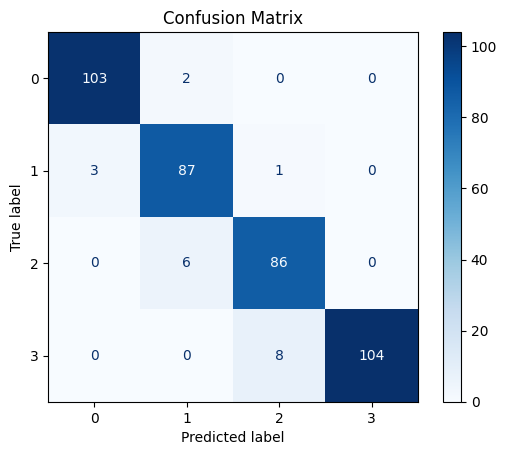

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,predknn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

cm=confusion_matrix(y_test,predknn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
buf = BytesIO()
plt.savefig(buf, format='png')
plt.close()
buf.seek(0)
confusion_matrix_dict["knn"] = buf


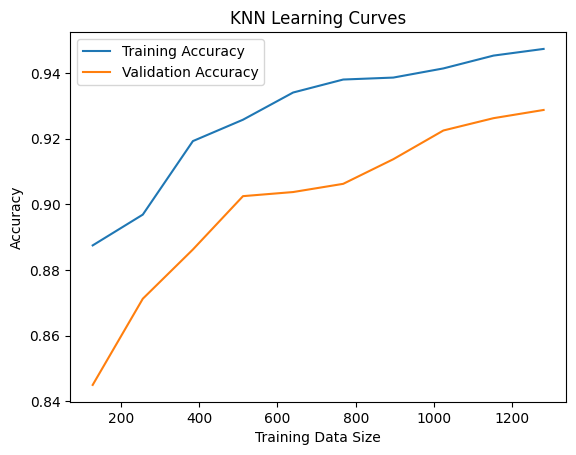

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=11), X_train, y_train, cv=5,
    scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Accuracy")
plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Validation Accuracy")
plt.xlabel("Training Data Size")
plt.ylabel("Accuracy")
plt.title("KNN Learning Curves")
plt.legend()
plt.show()

Training the model with the most important 2 features

In [ ]:
X = data[['battery_power', 'ram']]
y = data['price_range']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=0)
X_test_with_target = np.concatenate((X_test2, y_test2.values.reshape(-1, 1)), axis=1)
X_test_with_target = pd.DataFrame(X_test_with_target, columns=['battery_power', 'ram', 'price_range'])
from sklearn.model_selection import GridSearchCV
parameters2 = {
    'n_neighbors': range(1, 20),
    'metric': ['euclidean', 'manhattan']
}
grid_knn2 =GridSearchCV(estimator=knn ,
                     param_grid=parameters2 ,
                     scoring ="accuracy" ,
                     cv =5 ,
                     verbose=1 ,
                     n_jobs=-1)
grid_knn2.fit(X_train2,y_train2.ravel())
grid_knn2.best_params_

Fitting 5 folds for each of 38 candidates, totalling 190 fits


{'metric': 'manhattan', 'n_neighbors': 19}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train2, y_train2)
predictions = knn.predict(X_test2)

In [ ]:
knn.score(X_test2,y_test2)

0.79

In [ ]:
predknn2=knn.predict(X_test2)
print(classification_report(y_test2,predknn2))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        95
           1       0.71      0.73      0.72        92
           2       0.71      0.59      0.64        99
           3       0.83      0.91      0.87       114

    accuracy                           0.79       400
   macro avg       0.78      0.79      0.78       400
weighted avg       0.79      0.79      0.79       400



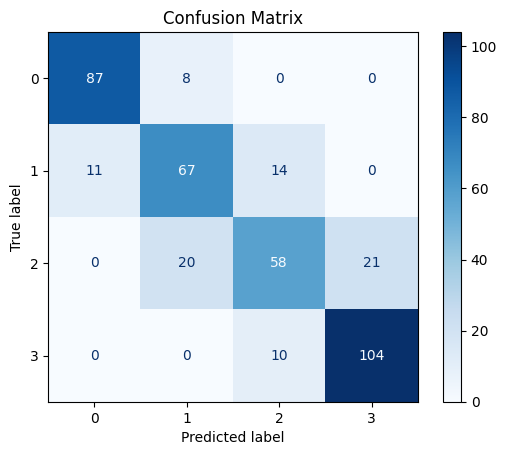

In [ ]:
cm=confusion_matrix(y_test2,predknn2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test2))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:

X_test_with_target['Predicted'] = predictions.astype(str)
color_map = { '0': 'red', '1': 'green', '2': 'blue', '3': 'orange' }
fig = px.scatter_3d(
    data_frame=X_test_with_target,
    x='battery_power',
    y='ram',
    z='price_range',
    color='Predicted',
    color_discrete_map=color_map,
    template='ggplot2',
    opacity=0.7,
    height=700,
    title='3D Visualization of KNN Predictions'
)
pio.show(fig)

In [ ]:
import plotly.graph_objects as go
X = data[['battery_power', 'ram']].to_numpy()
y = data['price_range'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
y_min, y_max = X[:, 1].min() - 10, X[:, 1].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = go.Figure()
#decision boundary
fig.add_trace(go.Contour(
    z=Z,
    x=xx[0],
    y=yy[:, 0],
    colorscale='Blues',
    showscale=False,
    opacity=0.5,
    name='Decision Boundary'
))
#training data
for class_value in np.unique(y_train):
    mask = y_train == class_value
    fig.add_trace(go.Scatter(
        x=X_train[mask, 0],
        y=X_train[mask, 1],
        mode='markers',
        marker=dict(size=5, opacity=0.8),
        name=f'Class {class_value} (Train)'
    ))
fig.update_layout(
    title="KNN Decision Boundary (2D)",
    xaxis_title="Battery Power",
    yaxis_title="RAM",
    template="plotly_white"
)

fig.show()

# **SVM**

In [ ]:
x=data.iloc[: , :-1]
y=data['price_range']

sc=StandardScaler()
x=sc.fit_transform(x)

# x = (x-np.min(x))/(np.max(x)-np.min(x))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


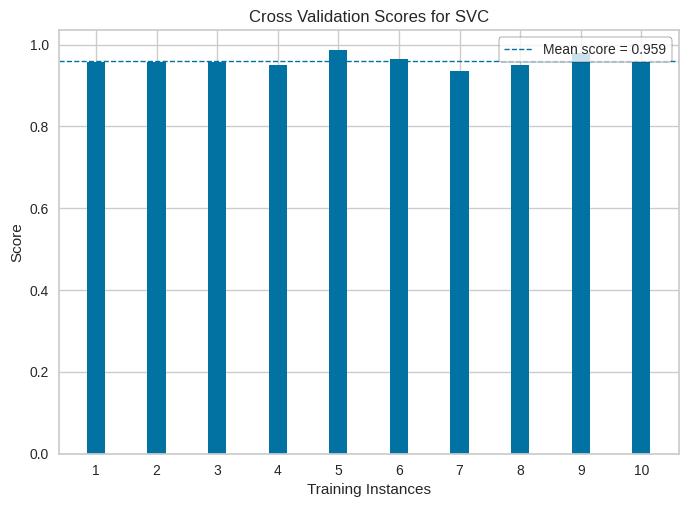

<Axes: title={'center': 'Cross Validation Scores for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
_, ax = plt.subplots()

cv = StratifiedKFold(10)

scores = CVScores(
    SVC(C=100,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1), ax=ax, cv=cv, scoring='accuracy'
)
scores.fit(X_train, y_train)
scores.poof()

In [ ]:

# Define a range of C values
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# Use SVM with a linear kernel
svc = SVC(kernel='linear', random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best parameter and the corresponding accuracy
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print("Best C:", best_C)
print("Best Cross-Validation Accuracy:", best_score)


Best C: 100
Best Cross-Validation Accuracy: 0.96


insights of the code:
#Data is Linearly Separable:
The linear kernel performs very well, indicating that the relationships in the dataset are effectively captured by a linear decision boundary this means that the data are seprated will so th kernel type is linear as data is linear sepraple.
#The cross-validation score and test accuracy are very close (~96.57% vs. 98%), showing no signs of overfitting.

In [ ]:
# Define parameter grid for different kernels
param_grid = {
    'kernel': ["linear", "rbf", "poly", "sigmoid"],  # Test different kernels
    'C': [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10, 100],       # Regularization parameter
    'gamma': ["scale", "auto", 0.1, 0.01, 0.001],   # For rbf and poly kernels
    'degree': [2, 3]                                # Only for poly kernel
}

# Initialize SVC
svc = SVC(random_state=42)

# Perform GridSearchCV on sampled data
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
acc_dict["svm"] = grid_search.best_score_*100
# Test the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report for Tuned SVM:")
print(classification_report(y_test, y_pred))
classification_report_dict["svm"] = classification_report(y_test, y_pred,  output_dict=True)

cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
buf = BytesIO()
plt.savefig(buf, format='png')
plt.close()
buf.seek(0)
confusion_matrix_dict["svm"] = buf


Best Parameters from Grid Search: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.96
Classification Report for Tuned SVM:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       151
           1       0.94      1.00      0.97       146
           2       0.98      0.95      0.97       148
           3       0.98      0.98      0.98       155

    accuracy                           0.97       600
   macro avg       0.98      0.98      0.97       600
weighted avg       0.98      0.97      0.98       600



**The regularization parameter 𝐶**

is set to a high value (C=100), indicating that the model prioritizes minimizing misclassification errors over maximizing the margin between classes. This suggests a focus on achieving a tighter fit to the training data, which can be beneficial if the data is well-separated and noise is minimal.

**Kernel = Linear:**

The linear kernel was chosen as the best kernel, suggesting that the decision boundary between the classes is linear or can be effectively approximated as linear. This is simpler than non-linear kernels and computationally efficient, making it suitable for datasets where relationships between classes do not require complex transformations.

**The cross-validation score of 0.96**

demonstrates that the model performs consistently well across multiple folds of training data. This high score reflects strong generalization ability, indicating the model is unlikely to overfit and will likely perform well on unseen data.

**Performance Metrics:**

**Recall:**

Class 0: Recall is 0.97, meaning 97% of actual class 0 instances were correctly predicted.

Class 1: Recall is 1.00, meaning all actual class 1 instances were predicted correctly.

Class 2: Recall is 0.95, meaning 95% of actual class 2 instances were predicted correctly.

Class 3: Recall is 0.98, meaning 98% of actual class 3 instances were correctly predicted.

**Precision:**

Class 0: Precision is 1.00, meaning 100% of predicted class 0 instances are correct.

Class 1: Precision is 0.94, indicating that while good, there is a small number of misclassified instances.

Class 2: Precision is 0.98, meaning the majority of predicted instances for this class are correct.

Class 3: Precision is 0.98, which is very good and reflects minimal misclassification.

**F1-scores**
 for all classes are high, particularly for Classes 0 and 3, demonstrating a balanced performance between precision and recall. These metrics confirm the robustness of the model for this classification task.


1-Hyperparameter tuning is the process of finding the optimal values for parameters that control the SVM's behavior.
(such as C and kernel)

(a) C importance:determines the trade-off between:
    - maximizing the margin between classes
    - minimizing the misclassification error
    
(b) kernel importance:
    - choosing a kernel that suits the data effectively
    The kernel parameter in Support Vector Machines (SVM) determines how the input data is transformed into a higher-dimensional space to make it easier to find a decision boundary that separates the data
    
2-GridSearchCV helps find the optimal values for these parameters systematically, ensuring the model performs its best.
so here we fond that the best c is Best C: 100

In [ ]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

# Display feature importances
importances = result.importances_mean
indices = importances.argsort()

# Print the top 5 important features
print("Top 5 Important Features:")
for idx in indices[-5:]:
    print(f"{data.columns[idx]}: {importances[idx]}")

Top 5 Important Features:
mobile_wt: 0.02366666666666665
px_height: 0.12716666666666665
px_width: 0.1308333333333333
battery_power: 0.22316666666666665
ram: 0.7076666666666667


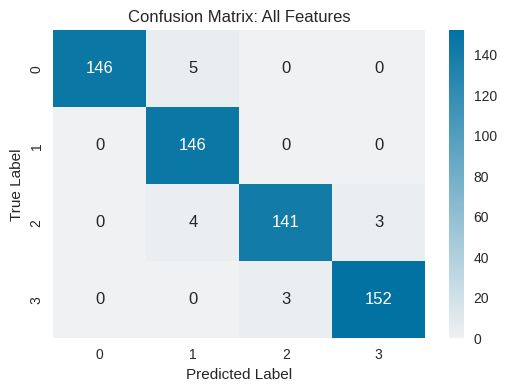

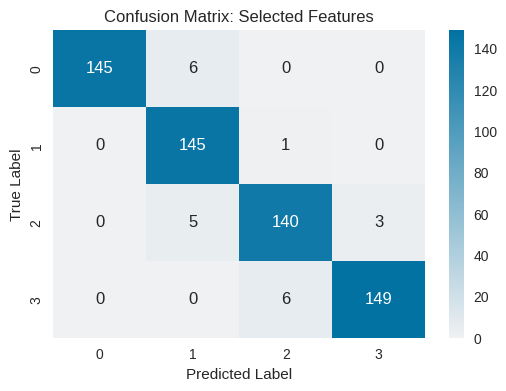

In [ ]:
model = SVC(kernel='linear', C=100, degree=2, gamma='scale', random_state=42)

# Train the model using all features
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)
X_train_all = X_train  # All features
X_test_all = X_test    # All features
model.fit(X_train_all, y_train)
y_pred_all = model.predict(X_test_all)
report_all = classification_report(y_test, y_pred_all, output_dict=True)

# Train the model using selected features (from permutation importance)
X_train_selected = X_train[['ram', 'battery_power', 'px_height','px_width']]
X_test_selected = X_test[['ram', 'battery_power', 'px_height', 'px_width']]
model.fit(X_train_selected, y_train)
y_pred_selected = model.predict(X_test_selected)
report_selected = classification_report(y_test, y_pred_selected, output_dict=True)

# Convert reports into DataFrame for comparison
report_all_df = pd.DataFrame(report_all).T
report_selected_df = pd.DataFrame(report_selected).T

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette("light:b", as_cmap=True))
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

comparison_df = pd.concat([report_all_df[['precision', 'recall', 'f1-score']],
                           report_selected_df[['precision', 'recall', 'f1-score']]],
                          axis=1,
                          keys=['All Features', 'Selected Features'])

plot_confusion_matrix(y_test, y_pred_all, "Confusion Matrix: All Features")

All_Features = report_all_df[['precision', 'recall', 'f1-score']].style.set_caption("All Features")
display(All_Features)
plot_confusion_matrix(y_test, y_pred_selected, "Confusion Matrix: Selected Features")
Selected_Features = report_selected_df[['precision', 'recall', 'f1-score']].style.set_caption("Selected Features")
display(Selected_Features)




In [ ]:
from sklearn.svm import SVC
from ipywidgets import interactive
from matplotlib.colors import ListedColormap

X = np.array(data.iloc[:,[0,13]])
Y = np.array(data['price_range'])
sc=StandardScaler()
X=sc.fit_transform(X)

# cmap_dark = plt.cm.PuBu_r
# cmap_bright = ListedColormap(plt.cm.PuBu_r(np.linspace(0.3, 1, 4)))
cmap_dark = sns.color_palette("light:b", as_cmap=True).reversed()
discrete_colors = cmap_dark(np.linspace(0.3, 1, 4))
cmap_bright = ListedColormap(discrete_colors)

# Function to Plot Decision Boundary
def plot_decision_boundary(kernel="linear", C_param=1.0):
    h = 0.02  # Step size for mesh grid

    # Initialize and train the SVC model
    clf = SVC(kernel=kernel, C=C_param)
    clf.fit(X, Y)

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on the grid points
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and scatter points
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_dark, shading="auto")
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bright, edgecolor="k", s=20)
    plt.title(f"Decision Boundary (kernel = {kernel}, C = {C_param})")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

# Interactive Widget
interactive_plot = interactive(
    plot_decision_boundary,
    kernel=["linear", "rbf", "poly", "sigmoid"],
    C_param=(0.01, 100.0, 0.01)
)

interactive_plot

interactive(children=(Dropdown(description='kernel', options=('linear', 'rbf', 'poly', 'sigmoid'), value='line…

In [ ]:
import plotly.express as px
import plotly.io as pio


X = data[['battery_power', 'ram']]
y = data['price_range']
sc=StandardScaler()
X=sc.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


X_test_with_target = np.concatenate((X_test, y_test.values.reshape(-1, 1)), axis=1)
X_test_with_target = pd.DataFrame(X_test_with_target, columns=['battery_power', 'ram', 'price_range'])


svc = SVC(kernel='linear', C=100, degree=2, gamma='scale', random_state=42)
svc.fit(X_train, y_train)


predictions = svc.predict(X_test)


X_test_with_target['Predicted'] = predictions.astype(str)

color_map = { '0': 'red', '1': 'green', '2': 'blue', '3': 'orange' }


fig = px.scatter_3d(
    data_frame=X_test_with_target,
    x='battery_power',
    y='ram',
    z='price_range',
    color='Predicted',
    color_discrete_map=color_map,
    template='ggplot2',
    opacity=0.7,
    height=700,
    title='3D Visualization of SVC Predictions'
)


pio.show(fig)

#  Decision Tree


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn import tree

In [ ]:
x=data.iloc[: , :-1]
y=data['price_range']
x
y
sc=StandardScaler()
xScaled=sc.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

Training & Plotting Decision Tree with depth = 4

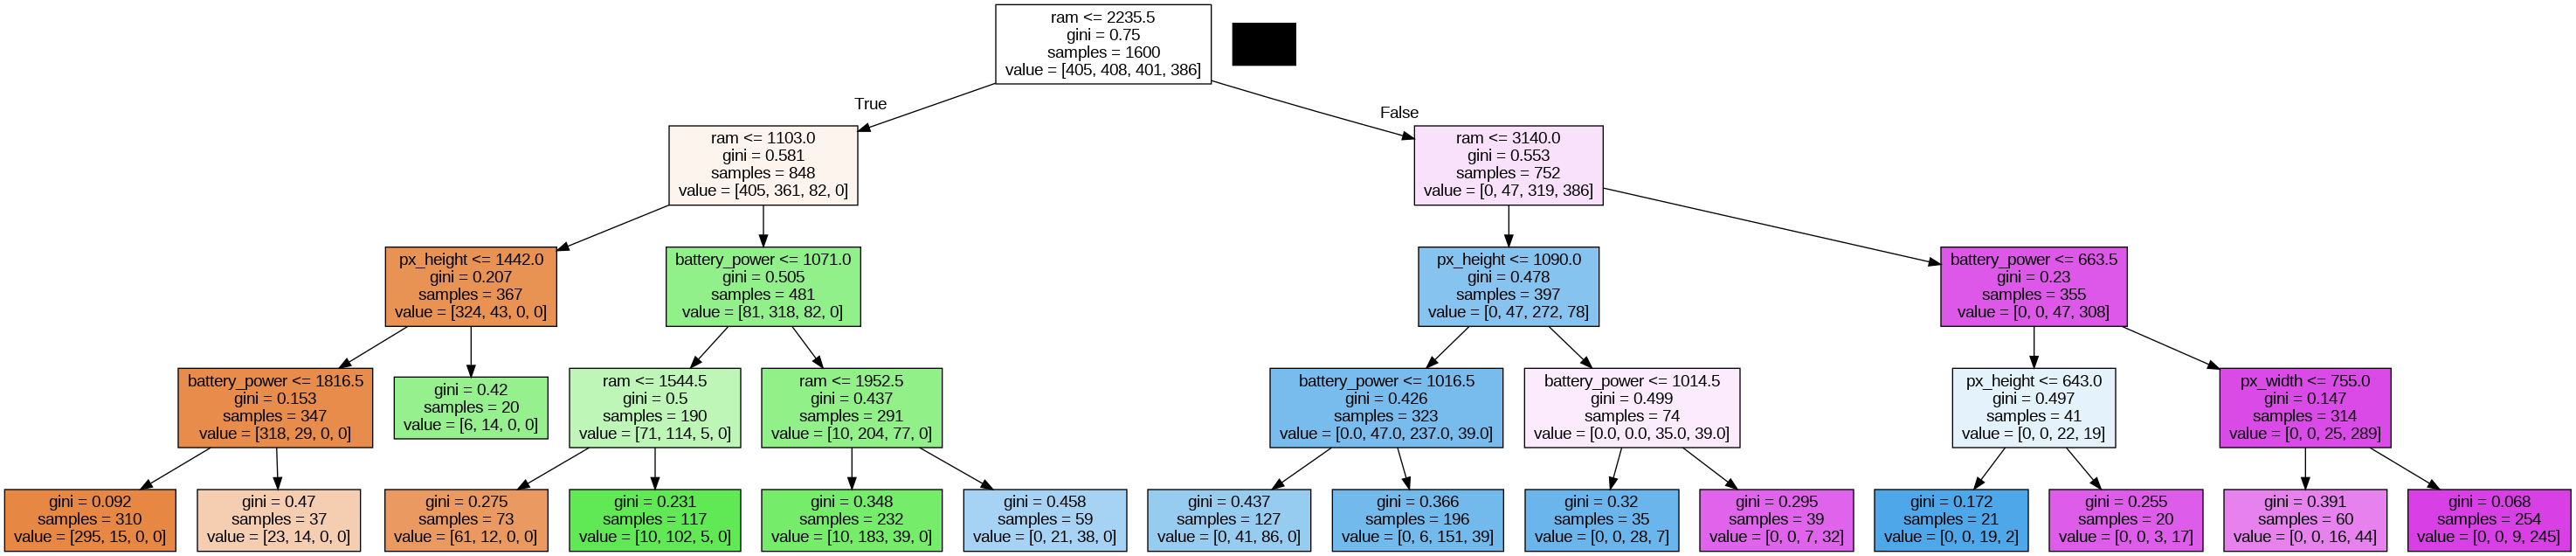

In [ ]:
clftree = tree.DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
clftree.fit(x_train, y_train)

y_train_pred = clftree.predict(x_train)
y_test_pred = clftree.predict(x_test)
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= x_train.columns, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
train_acc=accuracy_score(y_train, clftree.predict(x_train))
test_acc=accuracy_score(y_test, clftree.predict(x_test))
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

Training Accuracy: 0.84
Testing Accuracy: 0.80


In [ ]:
print(confusion_matrix(y_test, clftree.predict(x_test)))
print(classification_report(y_test, clftree.predict(x_test)))

[[89  6  0  0]
 [12 60 20  0]
 [ 0 12 76 11]
 [ 0  0 20 94]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        95
           1       0.77      0.65      0.71        92
           2       0.66      0.77      0.71        99
           3       0.90      0.82      0.86       114

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.79       400
weighted avg       0.80      0.80      0.80       400



## Overall Model Performance:
- The model achieved an accuracy of 80%, which shows reasonable performance but highlights room for improvement.

## Class-wise Performance:

- Class 0 (Low Price):  
Precision: 0.88, Recall: 0.94, F1-Score: 0.91  
The model performs very well for this class, with only 6 misclassifications out of 95 samples.  

- Class 1 (Medium Price):  
Precision: 0.77, Recall: 0.65, F1-Score: 0.71  
The model struggles to identify Class 1, misclassifying 20 samples into Class 2 and 12 samples into Class 0.  

- Class 2 (High Price):  
Precision: 0.66, Recall: 0.77, F1-Score: 0.71  
While the recall for Class 2 is good (77%), the precision is relatively low (66%), indicating the model misclassifies some other classes as Class 2.  

- Class 3 (Very High Price):  
Precision: 0.90, Recall: 0.82, F1-Score: 0.86  
Misclassifications primarily occur between Class 3 and Class 2.  

## Observations on Misclassifications:
- Most misclassifications occur between adjacent price classes,  
For example, between Class 1 and Class 2 or Class 2 and Class 3, indicating that the boundaries between these categories are not perfectly clear.
- Class 0 and Class 3 perform the best, indicating that lower and higher price ranges have clearer boundaries based on the features.

### We can further improve the accuracy by increasing the depth but it will result in making the tree harder to read:

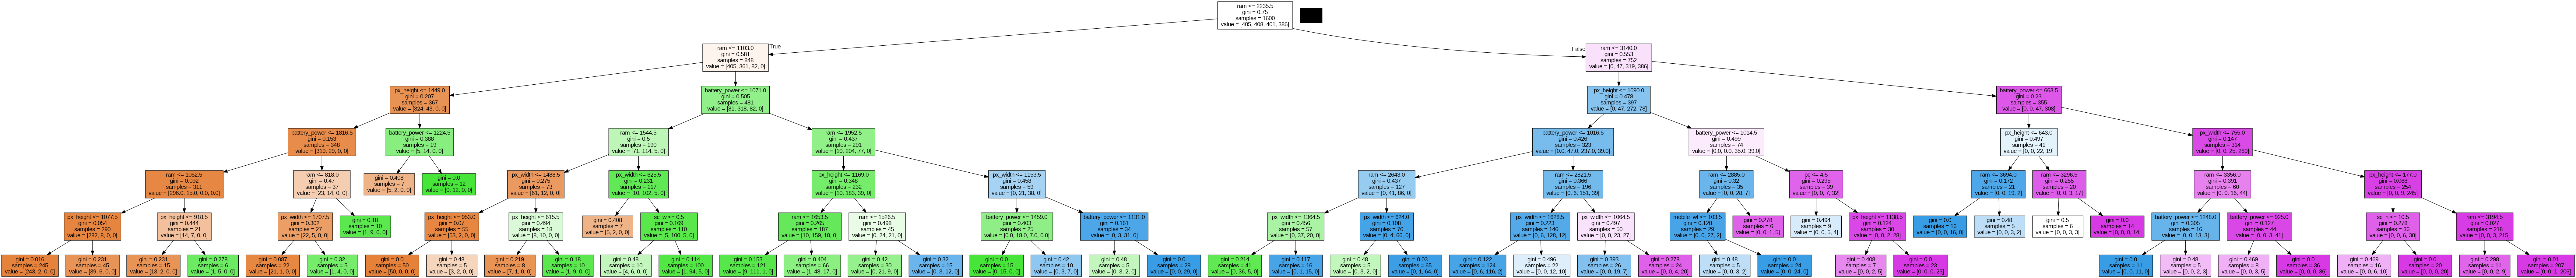

In [ ]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=6, min_samples_split=16)
clftree2.fit(x_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= x_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [ ]:
train_acc=accuracy_score(y_train, clftree2.predict(x_train))
test_acc=accuracy_score(y_test, clftree2.predict(x_test))
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")
acc_dict["decision_tree"] = test_acc*100

Training Accuracy: 0.91
Testing Accuracy: 0.84


In [ ]:
print(confusion_matrix(y_test, clftree2.predict(x_test)))
print(classification_report(y_test, clftree2.predict(x_test)))
classification_report_dict["decision_tree"]= classification_report(y_test, clftree2.predict(x_test),  output_dict=True)

cm=confusion_matrix(y_test,clftree2.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
buf = BytesIO()
plt.savefig(buf, format='png')
plt.close()
buf.seek(0)
confusion_matrix_dict["decision_tree"] = buf

[[ 86   9   0   0]
 [  6  74  12   0]
 [  0  12  76  11]
 [  0   0  12 102]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        95
           1       0.78      0.80      0.79        92
           2       0.76      0.77      0.76        99
           3       0.90      0.89      0.90       114

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.85       400



## Overall Model Performance:
- The accuracy of the model on the test data is 85%, which indicates a good level of performance.
- The model is able to classify most of the price ranges correctly but struggles slightly with specific classes.

## Class-wise Performance:
- Class 0 (Low Price):  
Precision: 0.93, Recall: 0.91, F1-Score: 0.92  
The model performs very well here, with only 9 misclassifications out of 95 samples.  

- Class 1 (Medium Price):  
Precision: 0.78, Recall: 0.80, F1-Score: 0.79  
Slight misclassifications occur, likely between classes 1 and 2 (medium to higher price).  

- Class 2 (High Price):  
Precision: 0.76, Recall: 0.79, F1-Score: 0.77  
Misclassifications are mainly observed between Class 2 and Class 3, suggesting the model struggles to separate higher price ranges.  

- Class 3 (Very High Price):  
Precision: 0.92, Recall: 0.89, F1-Score: 0.90  
The model performs well for this class, with 13 misclassifications into Class 2.  

## Observations on Misclassifications:
- Most misclassifications occur between adjacent price classes,  
For example, between Class 1 and Class 2 or Class 2 and Class 3, indicating that the boundaries between these categories are not perfectly clear.
- Class 0 and Class 3 perform the best, indicating that lower and higher price ranges have clearer boundaries based on the features.

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

In [ ]:
data=pd.read_csv(r'train (1).csv')
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [ ]:
rc = RandomForestClassifier(random_state = 42)

In [ ]:
rc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rc = rc.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred_rc)
accuracy

0.874

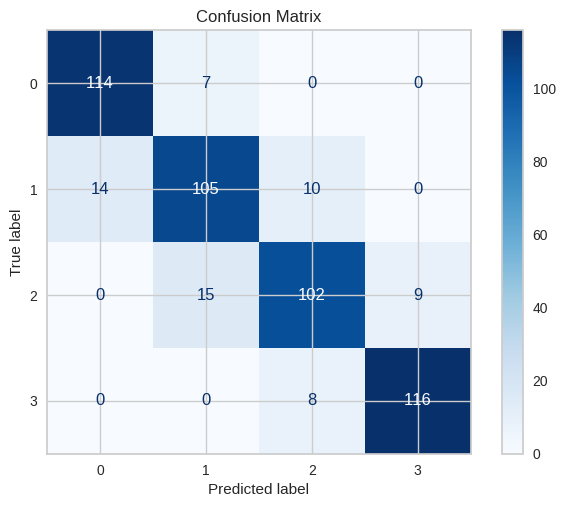

In [ ]:
ConfusionMatrixDisplay.from_estimator(rc, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold Cross-Validation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
cv_scores = cross_val_score(rf_model, x, y, cv=cv, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation of CV Accuracy:", np.std(cv_scores))


Cross-Validation Accuracy Scores: [0.8775 0.91   0.86   0.8625 0.885 ]
Mean CV Accuracy: 0.8789999999999999
Standard Deviation of CV Accuracy: 0.018069310999592657


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
acc_dict["random_forest"]= accuracy*100
accuracy

0.88

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
classification_report_dict["random_forest"] = classification_report(y_test, y_pred,  output_dict=True)
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
buf = BytesIO()
plt.savefig(buf, format='png')
plt.close()
buf.seek(0)
confusion_matrix_dict["random_forest"] = buf


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       100
           1       0.82      0.84      0.83       100
           2       0.81      0.79      0.80       100
           3       0.93      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



# Random Forest Algorithm with Cross-Validation

## Introduction
Random Forest is a powerful ensemble learning method that builds multiple decision trees and combines their outputs for better accuracy and generalization.

---

## Steps Implemented

### 1. Importing Libraries
Essential Python libraries like `pandas`, `numpy`, and `scikit-learn` are imported for data manipulation, machine learning, and performance evaluation. Visualization is handled using `matplotlib` and `seaborn`.

### 2. Loading the Dataset
The dataset, assumed to be stored in `mobile_price_classification.csv`, is loaded using `pandas.read_csv()`. Basic exploration, including the first few rows, column details, and missing value checks, is conducted.

### 3. Data Preparation
- **Features (X)**: All columns except `price_range` are selected as input features.
- **Target (y)**: The `price_range` column is chosen as the target variable.

### 4. Cross-Validation
- **Stratified K-Fold Cross-Validation**: Ensures that the class distribution is consistent across folds.
- **5-Fold Cross-Validation**: The dataset is split into 5 parts, with 4 used for training and 1 for validation in each iteration.
- **Evaluation Metric**: Accuracy scores are computed for each fold, along with the mean and standard deviation.

### 5. Train-Test Split
The dataset is split into training (80%) and testing (20%) sets using `train_test_split`.

### 6. Model Training
A `RandomForestClassifier` is trained using the training data, with 100 decision trees (`n_estimators=100`).

### 7. Model Evaluation
- **Predictions**: The trained model is used to predict test set labels.
- **Accuracy Score**: Measures overall performance on the test set.
- **Classification Report**: Provides precision, recall, F1-score, and support for each class.
- **Confusion Matrix**: Visualized using a heatmap for better interpretation of prediction errors.

### 8. Feature Importance
The importance of each feature is extracted from the trained model, sorted, and visualized to identify the most impactful features.

---


# Naive Bayes
In the Exploratory Data Analysis (EDA), we found that our dataset contains continuous, discrete, and binary features. Let's explore how to apply different variants of Naive Bayes based on the type of feature:



*   **Gaussian Naive Bayes** for continuous and discrete features.
*   **Multinomial Naive Bayes** for discrete features.
*   **Bernoulli Naive Bayes** for binary features.









In [ ]:
import ipywidgets as widgets
from IPython.display import display
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
continuous_features = ['battery_power', 'clock_speed', 'm_dep', 'mobile_wt',
                       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'fc', 'int_memory', 'n_cores', 'pc']
discrete_features = ['fc', 'int_memory', 'n_cores', 'pc']

def plot_feature_distributions(data, features, feature_type, hue='price_range'):
    n_features = len(features)
    ncols = 4
    nrows = (n_features + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
    fig.tight_layout(pad=5.0)

    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]
        if feature_type == 'binary' or feature_type == 'discrete':
            sns.countplot(x=feature, hue=hue, data=data, palette=sns.light_palette("seagreen", as_cmap=True), ax=ax)
        elif feature_type == 'continuous':
            sns.kdeplot(x=feature, hue=hue, data=data, fill=True, palette="Set2", common_norm=False, ax=ax)

        ax.set_title(f"{feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Count/Density")

    # Remove excess empty subplots
    for i in range(n_features, len(axes)):
        fig.delaxes(axes[i])

    plt.show()

# Function to display selected plot type
def display_plots(plot_group):
    if plot_group == 'Binary Features':
        plot_feature_distributions(data, binary_features, 'binary')
    elif plot_group == 'Continuous Features':
        plot_feature_distributions(data, continuous_features, 'continuous')
    elif plot_group == 'Discrete Features':
        plot_feature_distributions(data, discrete_features, 'discrete')

# Create dropdown widget for user selection
dropdown = widgets.Dropdown(
    options=['Binary Features', 'Continuous Features', 'Discrete Features'],
    description='Select Plot Group:',
    disabled=False
)

widgets.interactive(display_plots, plot_group=dropdown)

interactive(children=(Dropdown(description='Select Plot Group:', options=('Binary Features', 'Continuous Featu…

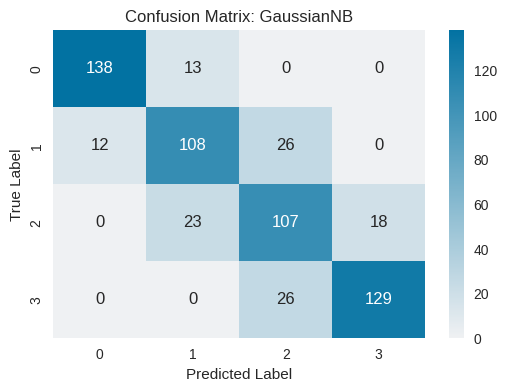

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler
X_continuous = data[continuous_features]

sc=MinMaxScaler()
X_continuous=sc.fit_transform(X_continuous)
X_train_continuous, X_test_continuous, y_train, y_test = train_test_split(X_continuous, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train_continuous, y_train)
y_pred = gnb.predict(X_test_continuous)
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix: GaussianNB")
report  = classification_report(y_test, y_pred,  output_dict=True)
classification_report_dict["Naive_bays"] = report
report_df = pd.DataFrame(report)
GaussianNB_report= report_df.T.style.set_caption("GaussianNB")
display(GaussianNB_report)
accuracy = accuracy_score(y_test, y_pred)
acc_dict["Naive_bays"] = round(accuracy * 100, 2)
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
buf = BytesIO()
plt.savefig(buf, format='png')
plt.close()
buf.seek(0)
confusion_matrix_dict["Naive_bays"] = buf


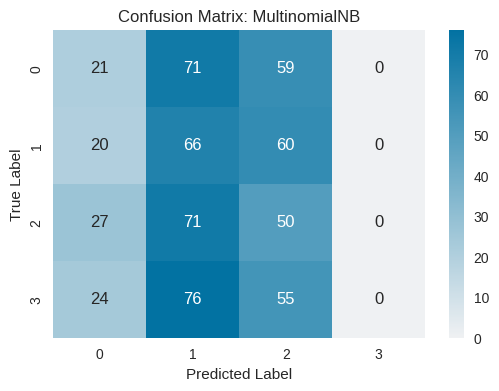

In [ ]:
X_discrete = data[discrete_features]

sc=MinMaxScaler()
X_discrete=sc.fit_transform(X_discrete)
X_train_discrete, X_test_discrete, y_train, y_test = train_test_split(X_discrete, y, test_size=0.3, random_state=42)

mnb = MultinomialNB()
mnb.fit(X_train_discrete, y_train)

y_pred = mnb.predict(X_test_discrete)

plot_confusion_matrix(y_test, y_pred, "Confusion Matrix: MultinomialNB")
report  = classification_report(y_test, y_pred,  output_dict=True)
report_df = pd.DataFrame(report)
MultinomialNB_report= report_df.T.style.set_caption("MultinomialNB")
display(MultinomialNB_report)


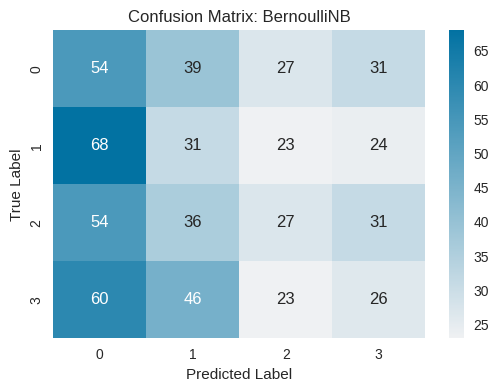

In [ ]:
X_binary = data[binary_features]

sc=MinMaxScaler()
X_binary=sc.fit_transform(X_binary)
X_train_binary, X_test_binary, y_train, y_test = train_test_split(X_binary, y, test_size=0.3, random_state=42)
bnb = BernoulliNB()
bnb.fit(X_train_binary, y_train)

y_pred = bnb.predict(X_test_binary)
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix: BernoulliNB")
report  = classification_report(y_test, y_pred,  output_dict=True)
report_df = pd.DataFrame(report)
BernoulliNB_report= report_df.T.style.set_caption("BernoulliNB")
display(BernoulliNB_report)

In [ ]:
cmap_dark = plt.cm.PuBuGn_r
cmap_bright = ListedColormap(plt.cm.PuBuGn_r(np.linspace(0.3, 1, 4)))
def plot_decision_boundary(nb_type):
    if nb_type == 'GaussianNB':
        features = continuous_features
        X_train, X_test, y_train, y_test = train_test_split(X_continuous, y, test_size=0.3, random_state=42)
        X_train = np.array(X_train)[:, [0, 6]]
        y_train = np.array(y_train)
        model = GaussianNB()
    elif nb_type == 'MultinomialNB':
        features = discrete_features
        X_train, X_test, y_train, y_test = train_test_split(X_discrete, y, test_size=0.3, random_state=42)
        X_train = np.array(X_train)[:, :2]
        y_train = np.array(y_train)
        model = MultinomialNB()
    elif nb_type == 'BernoulliNB':
        features = binary_features
        X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.3, random_state=42)
        X_train = np.array(X_train)[:, :2]
        y_train = np.array(y_train)
        model = BernoulliNB()

    # Fit the model
    model.fit(X_train, y_train)

    # Mesh grid for decision boundary, restricted to [0, 1] range
    x_min, x_max = 0, 1
    y_min, y_max = 0, 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_dark)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cmap_bright, s=20)
    plt.xlim(0, 1)  # Ensure x-axis range is [0, 1]
    plt.ylim(0, 1)  # Ensure y-axis range is [0, 1]
    plt.title(f'Decision Boundary for {nb_type}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
# Dropdown widget
interact(plot_decision_boundary, nb_type=widgets.Dropdown(
    options=['GaussianNB', 'MultinomialNB', 'BernoulliNB'],
    value='GaussianNB',
    description='NB Type:',
    style={'description_width': 'initial'}
))

interactive(children=(Dropdown(description='NB Type:', options=('GaussianNB', 'MultinomialNB', 'BernoulliNB'),…

<function __main__.plot_decision_boundary(nb_type)>


From this, we can conclude that Gaussian Naive Bayes performs better for this dataset. This is because most of the features are normally distributed.

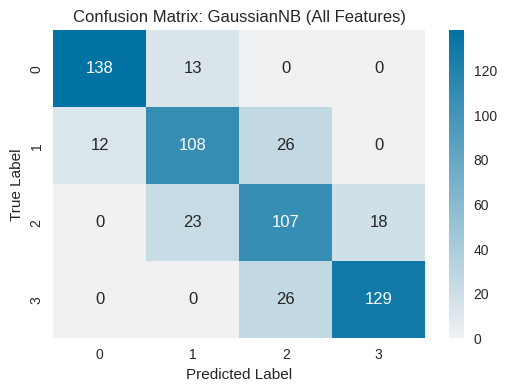

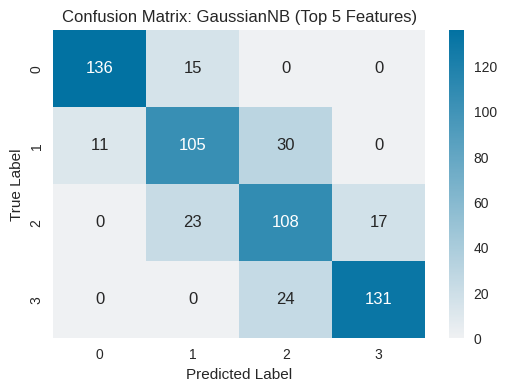

In [ ]:
gnb_full = GaussianNB()
gnb_full.fit(X_train_continuous, y_train)
y_pred_full = gnb_full.predict(X_test_continuous)

plot_confusion_matrix(y_test, y_pred_full, "Confusion Matrix: GaussianNB (All Features)")
report_full = classification_report(y_test, y_pred_full, output_dict=True)
report_df_full = pd.DataFrame(report_full)
GaussianNB_full_report = report_df_full.T.style.set_caption("GaussianNB (All Features)")
display(GaussianNB_full_report)

top5_features = ['mobile_wt', 'px_height', 'px_width', 'battery_power', 'ram']
X_selected = data[top5_features]
X_selected = sc.fit_transform(X_selected)
X_train_selected, X_test_selected, _, _ = train_test_split(X_selected, y, test_size=0.3, random_state=42)

gnb_selected = GaussianNB()
gnb_selected.fit(X_train_selected, y_train)
y_pred_selected = gnb_selected.predict(X_test_selected)

# Confusion Matrix and Report for Selected Features
plot_confusion_matrix(y_test, y_pred_selected, "Confusion Matrix: GaussianNB (Top 5 Features)")
report_selected = classification_report(y_test, y_pred_selected, output_dict=True)
report_df_selected = pd.DataFrame(report_selected)
GaussianNB_selected_report = report_df_selected.T.style.set_caption("GaussianNB (Top 5 Features)")
display(GaussianNB_selected_report)

In [ ]:
import plotly.express as px
import plotly.io as pio


X = data[['battery_power', 'ram']]
y = data['price_range']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


X_test_with_target = np.concatenate((X_test, y_test.values.reshape(-1, 1)), axis=1)
X_test_with_target = pd.DataFrame(X_test_with_target, columns=['battery_power', 'ram', 'price_range'])


gnb = GaussianNB()
gnb.fit(X_train, y_train)


predictions = gnb.predict(X_test)


X_test_with_target['Predicted'] = predictions.astype(str)

# Define color mapping: e.g., '0' -> 'red', '1' -> 'green', etc.
color_map = { '0': 'red', '1': 'green', '2': 'blue', '3': 'orange' }

fig = px.scatter_3d(
    data_frame=X_test_with_target,
    x='battery_power',
    y='ram',
    z='price_range',
    color='Predicted',
    color_discrete_map=color_map,
    template='ggplot2',
    opacity=0.7,
    height=700,
    title='3D Visualization of GaussianNB Predictions'
)

pio.show(fig)


Accuracy Table
           Model  Accuracy (%)
0            knn         95.00
1            svm         96.00
2  decision_tree         84.50
3  random_forest         88.00
4     Naive_bays         80.33

Macro Average Table
           Model  Precision    Recall  F1-Score
0            knn   0.948188  0.950088  0.948634
1            svm   0.975437  0.975059  0.974916
2  decision_tree   0.844096  0.843006  0.843432
3  random_forest   0.879614  0.880000  0.879734
4     Naive_bays   0.805127  0.802216  0.803286


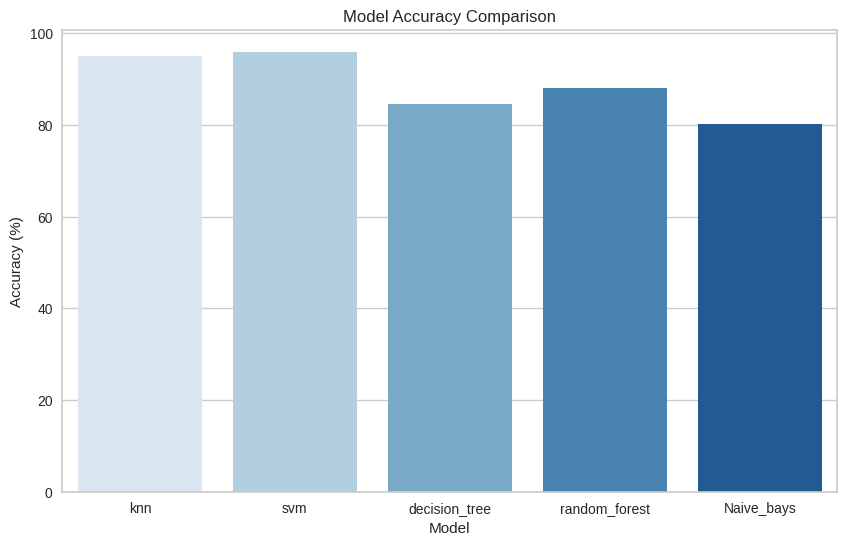

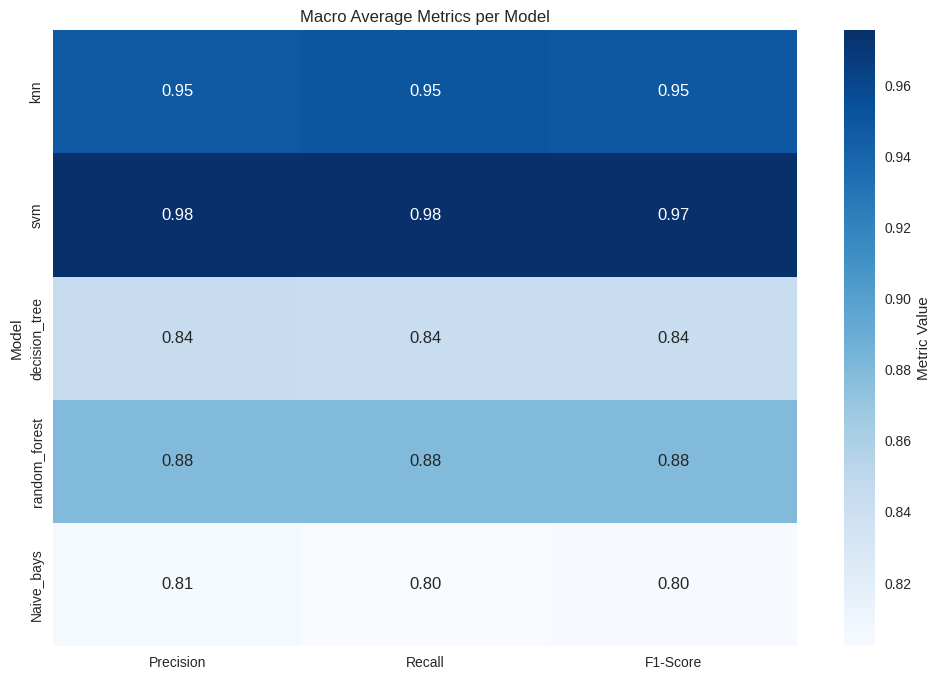

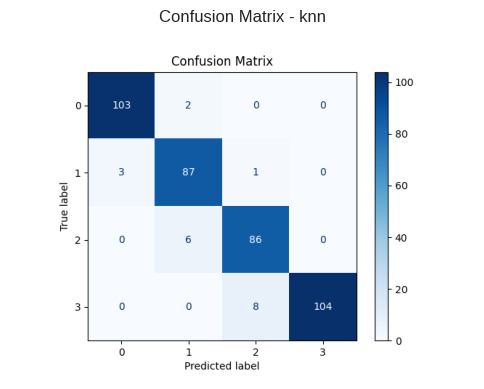

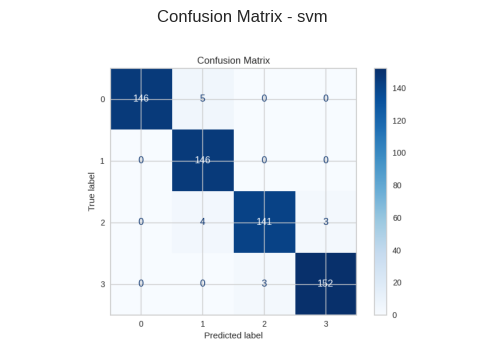

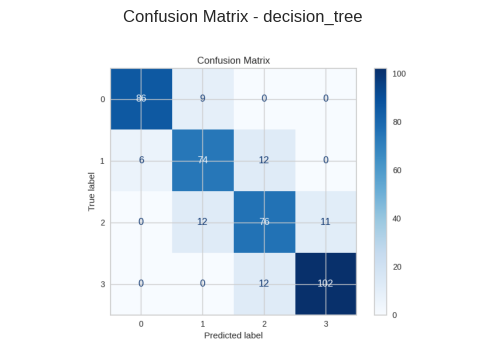

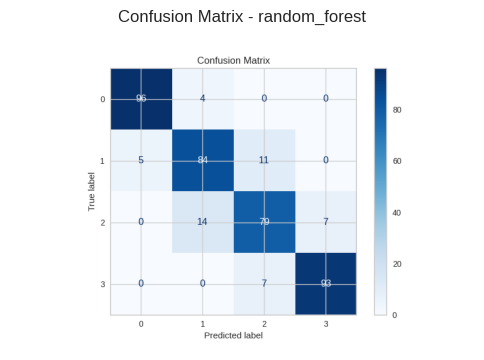

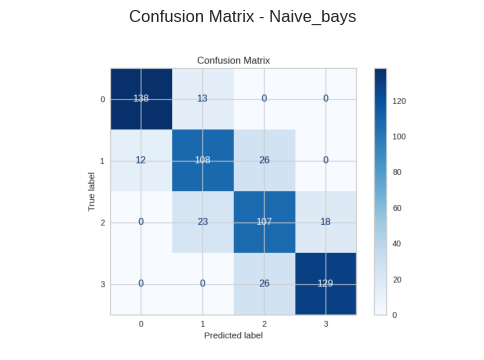

In [ ]:
from PIL import Image
accuracy_df = pd.DataFrame(list(acc_dict.items()), columns=["Model", "Accuracy (%)"])
print("Accuracy Table")
print(accuracy_df)

# Display Macro Avg Metrics Table
macro_avg_data = [
    (model, metrics['macro avg']['precision'], metrics['macro avg']['recall'], metrics['macro avg']['f1-score'])
    for model, metrics in classification_report_dict.items()
]
macro_avg_df = pd.DataFrame(macro_avg_data, columns=["Model", "Precision", "Recall", "F1-Score"])
print("\nMacro Average Table")
print(macro_avg_df)

# Plot Accuracy Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df, x="Model", y="Accuracy (%)", palette="Blues")
plt.title("Model Accuracy Comparison")
plt.show()

# Plot Macro Avg Metrics as Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    macro_avg_df.set_index("Model"),
    annot=True, fmt=".2f", cmap="Blues",
    cbar_kws={'label': 'Metric Value'}
)
plt.title("Macro Average Metrics per Model")
plt.show()


for model, buf in confusion_matrix_dict.items():
    buf.seek(0)  # Reset the buffer pointer
    img = Image.open(buf)  # Open the BytesIO object as an image

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.title(f"Confusion Matrix - {model}")
    plt.show()

**From Accuracy Percpective:**

SVM achieved the highest accuracy (96%), followed by KNN (95%)

Decision Tree and Random Forest performed moderately well, with 84.5% and 88% accuracy

Naive Bayes showed the lowest accuracy, at 80.33%.

**Summary of the 5 models' results:**

SVM emerged as the best-performing model, excelling in all evaluation metrics. It is the most reliable choice for this dataset.

KNN also performed strongly, offering competitive results in accuracy and macro averages.

Models like Random Forest and Decision Tree showed moderate performance.

Naive Bayes, despite its simplicity, struggled with this dataset and may not be suitable.